In [1]:
import pandas as pd
import os

In [2]:
!pip install openpyxl

In [3]:
!pip install seaborn

# Preparing energy consumption data

In [4]:
folder_path = "C:/Users/Sourabh.Bharti/Desktop/High-resolution electric power load data of an industrial park/2018/1_hour/2018_1hour_Commercial"
all_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file_name)
        daily_data = pd.read_excel(file_path)
        all_data = pd.concat([all_data, daily_data], ignore_index=True)

Dropping the duplicates

In [5]:
consumption_data = all_data.drop_duplicates(subset=['Time'])

In [6]:
consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8507 entries, 0 to 9124
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        8507 non-null   object 
 1   Power (kW)  8408 non-null   float64
dtypes: float64(1), object(1)
memory usage: 199.4+ KB


In [7]:
consumption_data.describe()

Power (kW)
count  8408.000000
mean    672.648667
std     251.611474
min     216.760000
25%     502.420000
50%     650.470000
75%     806.997500
max    1880.930000

In [8]:
#checking the null values in all columns
consumption_data.isnull().sum().sort_values(ascending = True)

Time           0
Power (kW)    99
dtype: int64

In [9]:
print(consumption_data[all_data.isnull().any(axis=1)])

                     Time  Power (kW)
114   2018-01-05 14:00:00         NaN
324   2018-01-14 00:00:00         NaN
326   2018-01-14 01:00:00         NaN
383   2018-01-16 08:00:00         NaN
1767  2018-03-12 17:00:00         NaN
...                   ...         ...
6837  2018-10-01 12:00:00         NaN
6838  2018-10-01 13:00:00         NaN
6839  2018-10-01 14:00:00         NaN
6840  2018-10-01 15:00:00         NaN
6841  2018-10-01 16:00:00         NaN

[99 rows x 2 columns]


C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\2594176055.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(consumption_data[all_data.isnull().any(axis=1)])


Handling the missing values using simple imputation - using interpolation (linear) for curve fitting

In [10]:
consumption_data_interpolated = consumption_data.interpolate()
# Convert the timestamp column to a datetime object if it's not already
consumption_data_interpolated['Time'] = pd.to_datetime(consumption_data_interpolated['Time'])

In [11]:
consumption_data_interpolated.isnull().sum().sort_values(ascending = True)

Time          0
Power (kW)    0
dtype: int64

In [12]:
consumption_data_interpolated.iloc[110]

Time          2018-01-05 14:00:00
Power (kW)                 810.81
Name: 114, dtype: object

# Exploratory analysis of Energy consumption data

# Preparing the weather data

In [13]:
folder_path = "C:/Users/Sourabh.Bharti/Desktop/High-resolution electric power load data of an industrial park/Weather data/2018"
all_weather_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx"):
        file_path = os.path.join(folder_path, file_name)
        daily_data = pd.read_excel(file_path)
        all_weather_data = pd.concat([all_weather_data, daily_data], ignore_index=True)

In [14]:
all_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             9125 non-null   object 
 1   Temperature (℃)  8978 non-null   float64
 2   Humidity (%RH)   8978 non-null   float64
dtypes: float64(2), object(1)
memory usage: 214.0+ KB


In [15]:
all_weather_data.describe()

Temperature (℃)  Humidity (%RH)
count      8978.000000     8978.000000
mean         17.944208       74.232791
std           9.775893       17.611889
min          -5.000000       16.000000
25%          10.000000       63.000000
50%          18.900000       78.000000
75%          26.700000       88.000000
max          37.800000      100.000000

In [16]:
weather_data = all_weather_data.drop_duplicates(subset=['Time'])

In [17]:
weather_data_interpolated = weather_data.interpolate()

In [18]:
weather_data_interpolated.isnull().sum().sort_values(ascending = True)

Time               0
Temperature (℃)    0
Humidity (%RH)     0
dtype: int64

In [19]:
weather_data_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8738 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             8738 non-null   object 
 1   Temperature (℃)  8738 non-null   float64
 2   Humidity (%RH)   8738 non-null   float64
dtypes: float64(2), object(1)
memory usage: 273.1+ KB


In [20]:
consumption_data_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8507 entries, 0 to 9124
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        8507 non-null   datetime64[ns]
 1   Power (kW)  8507 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 199.4 KB


In [21]:
weather_data_interpolated['Time'] = pd.to_datetime(weather_data_interpolated['Time'])

# Merging the consumption data and weather data

In [22]:
merged = pd.merge(weather_data_interpolated, consumption_data_interpolated, on='Time', how='inner')

In [23]:
print(merged)

                    Time  Temperature (℃)  Humidity (%RH)  Power (kW)
0    2018-01-01 00:00:00              4.4            89.0      840.76
1    2018-01-01 01:00:00              3.3            95.0      712.29
2    2018-01-01 02:00:00              2.2           100.0      585.82
3    2018-01-01 03:00:00              2.2            97.0      520.49
4    2018-01-01 04:00:00              1.7            97.0      422.83
...                  ...              ...             ...         ...
8479 2018-12-31 20:00:00              2.8            80.0     1208.69
8480 2018-12-31 21:00:00              2.8            78.0     1244.72
8481 2018-12-31 22:00:00              2.8            79.0     1309.06
8482 2018-12-31 23:00:00              2.8            80.0     1282.90
8483 2019-01-01 00:00:00              2.8            81.0     1181.15

[8484 rows x 4 columns]


In [24]:
merged.head()

Time  Temperature (℃)  Humidity (%RH)  Power (kW)
0 2018-01-01 00:00:00              4.4            89.0      840.76
1 2018-01-01 01:00:00              3.3            95.0      712.29
2 2018-01-01 02:00:00              2.2           100.0      585.82
3 2018-01-01 03:00:00              2.2            97.0      520.49
4 2018-01-01 04:00:00              1.7            97.0      422.83

# Visualisation

In [25]:
from chart_studio import plotly as py

In [26]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [27]:
merged_data = merged.rename(columns={"Temperature (℃)": "Temperature", "Humidity (%RH)": "Humidity", "Power (kW)": "Power"})

In [28]:
start_date = '2018-07-25 00:00:00'
end_date = '2018-07-31 23:00:00'

# Filter the DataFrame for the specified date range
subset_data = merged_data[(merged_data['Time'] >= start_date) & (merged_data['Time'] <= end_date)]

In [29]:
subset_data.head()

Time  Temperature  Humidity   Power
4759 2018-07-25 00:00:00         29.4      86.0  990.73
4760 2018-07-25 01:00:00         28.9      83.0  856.61
4761 2018-07-25 02:00:00         29.4      82.0  794.37
4762 2018-07-25 03:00:00         28.3      85.0  776.25
4763 2018-07-25 04:00:00         28.3      85.0  703.21

In [30]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Temperature', 'Humidity', 'Power']  # Add your column names

# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit the scaler on the selected columns and transform the data
subset_data[columns_to_normalize] = scaler.fit_transform(subset_data[columns_to_normalize])

# Now df contains normalized values for the selected columns


C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\2888068988.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
subset_data.head()

Time  Temperature  Humidity     Power
4759 2018-07-25 00:00:00     0.243243  0.860465  0.772367
4760 2018-07-25 01:00:00     0.198198  0.790698  0.529313
4761 2018-07-25 02:00:00     0.243243  0.767442  0.416520
4762 2018-07-25 03:00:00     0.144144  0.837209  0.383683
4763 2018-07-25 04:00:00     0.144144  0.837209  0.251318

In [32]:
#visualizing the timeseries variation of the appliance energy consumption
visData = go.Scatter(x=subset_data.Time, mode = "lines", y = subset_data.Temperature)
layout = go.Layout(title = 'Temperature', xaxis=dict(title='Date'), yaxis=dict(title='((celcius))'))
fig1 = go.Figure(data=[visData],layout=layout)

In [33]:
#visualizing the timeseries variation of the appliance energy consumption
visData = go.Scatter(x=subset_data.Time, mode = "lines", y = subset_data.Humidity)
layout = go.Layout(title = 'Humidity', xaxis=dict(title='Date'), yaxis=dict(title='((RH))'))
fig2 = go.Figure(data=[visData],layout=layout)

In [34]:
#visualizing the timeseries variation of the appliance energy consumption
visData = go.Scatter(x=subset_data.Time, mode = "lines", y = subset_data.Power)
layout = go.Layout(title = 'Consumption', xaxis=dict(title='Date'), yaxis=dict(title='((kW))'))
fig3 = go.Figure(data=[visData],layout=layout)

In [35]:
import plotly.graph_objects as go

# Assuming fig1, fig2, and fig3 are your individual iplot figures

# Create a new figure
combined_fig = go.Figure()

# Add traces from fig1 to the combined figure
for trace in fig1['data']:
    combined_fig.add_trace(trace)

# Add traces from fig2 to the combined figure
#for trace in fig2['data']:
 #   combined_fig.add_trace(trace)

# Add traces from fig3 to the combined figure
for trace in fig3['data']:
    combined_fig.add_trace(trace)

# Update layout for better visualization
combined_fig.update_layout(title='Combined Plot', showlegend=True)

# Show the combined figure
combined_fig.show()


In [36]:
time_series_data = subset_data.copy()

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

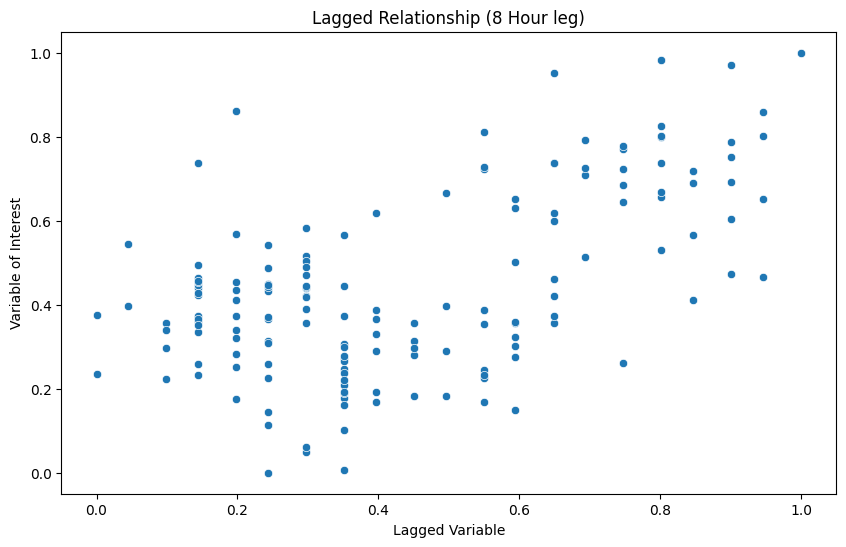

Correlation between Lagged Variable and Variable of Interest: 0.5585411814261523


In [38]:
lag_periods = 8  # Adjust this based on the desired lag
time_series_data['lagged_variable'] = time_series_data['Temperature'].shift(lag_periods)

# Drop rows with NaN resulting from the shift operation
time_series_data = time_series_data.dropna()

# Visualize the lagged relationship using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lagged_variable', y='Power', data=time_series_data)
plt.title(f'Lagged Relationship ({lag_periods} Hour leg)')
plt.xlabel('Lagged Variable')
plt.ylabel('Variable of Interest')
plt.show()

# Calculate the correlation between the lagged variable and the variable of interest
correlation = time_series_data['lagged_variable'].corr(time_series_data['Power'])
print(f"Correlation between Lagged Variable and Variable of Interest: {correlation}")


# There is a lagged relationship 

In [39]:
#seperating dependent and independent variables
feature_vars = merged_data[["Temperature"] + ["Humidity"]]
target_vars = merged_data["Power"]

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>]], dtype=object)

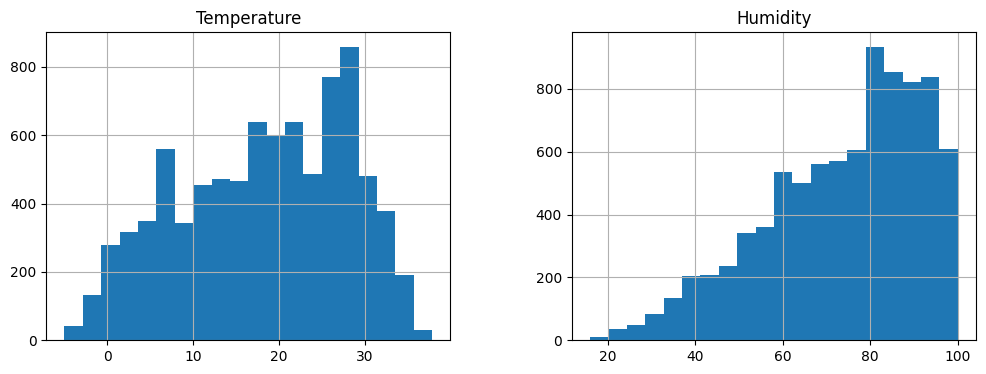

In [40]:
#Histogram of all the features to understand the distribution
feature_vars.hist(bins=20, figsize=(12,4))

<Axes: >

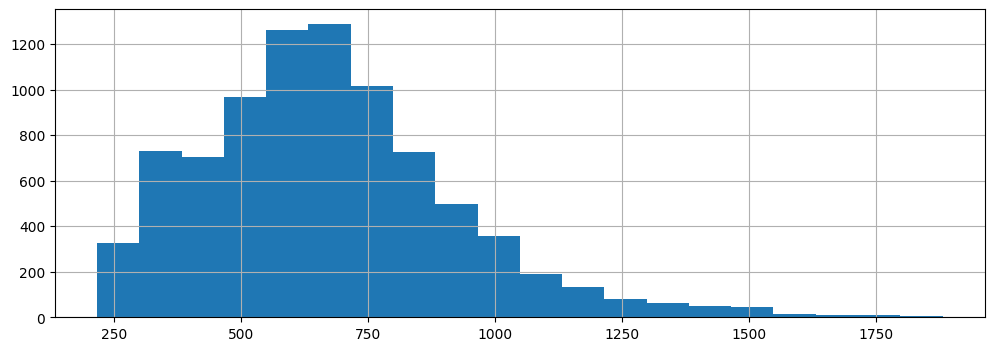

In [41]:
target_vars.hist(bins=20, figsize=(12,4))

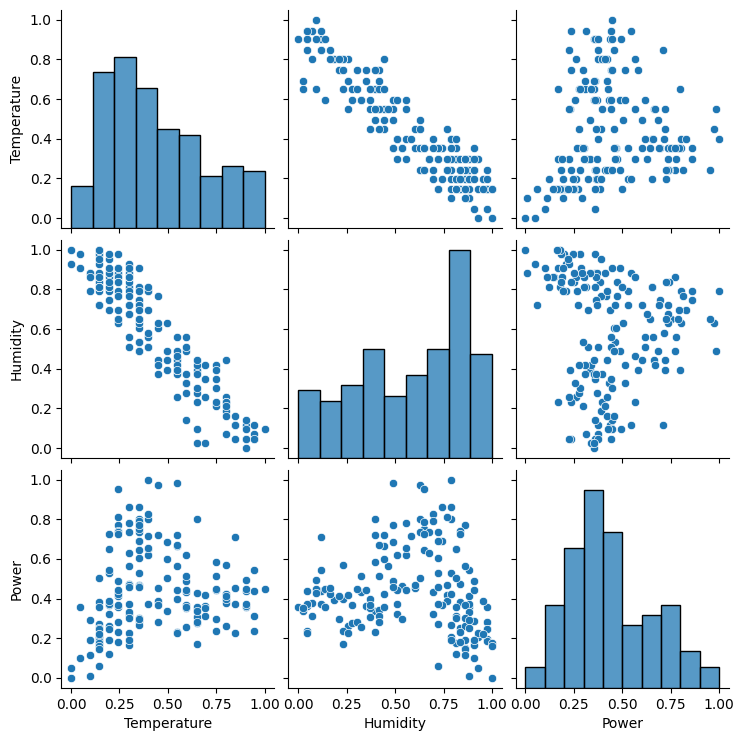

In [42]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(subset_data)

C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\562631620.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



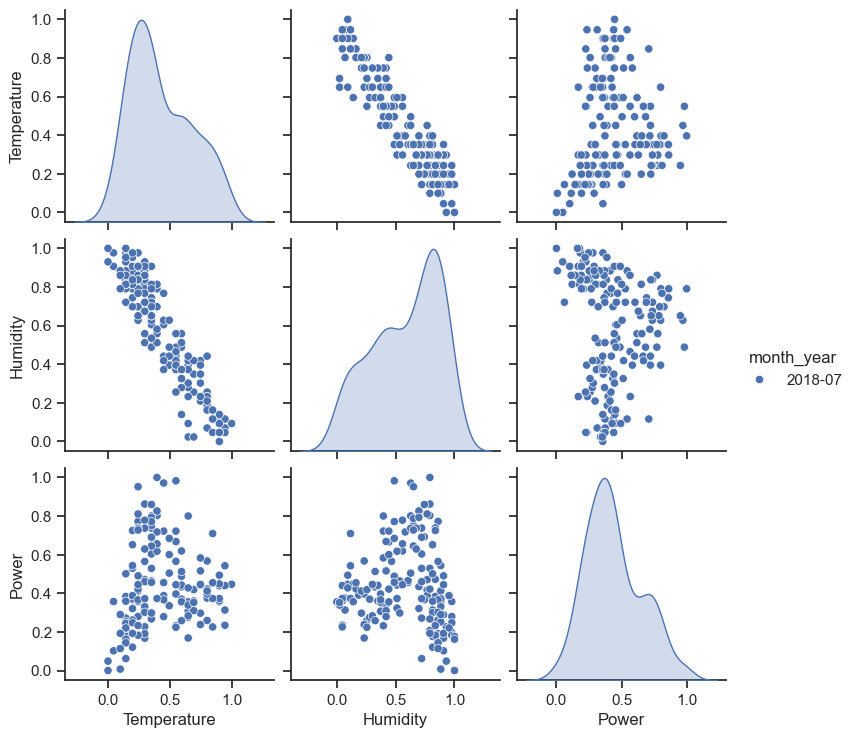

In [43]:
subset_data['month_year'] = subset_data['Time'].dt.to_period('M')

# Create a pair plot for each month-year
sns.set(style="ticks")
sns.pairplot(subset_data, hue='month_year', markers='o')

plt.show()

# Correlation analysis

In [44]:
# Select relevant columns for correlation analysis
selected_columns = ['Temperature', 'Humidity', 'Power']

# Create a subset DataFrame with selected columns
data = subset_data[selected_columns]

# Z-score normalization for each variable
normalized_data = (data - data.mean()) / data.std()

# Perform correlation analysis on normalized data
correlation_matrix = normalized_data.corr()

#Below methods are for nonlinear relationships
#correlation_matrix = normalized_data.corr(method='spearman')
#correlation_matrix = normalized_data.corr(method='kendall')

# Display the correlation matrix
print("Correlation Matrix after Z-score Normalization for each variable:")
print(correlation_matrix)


Correlation Matrix after Z-score Normalization for each variable:
             Temperature  Humidity     Power
Temperature     1.000000 -0.926164  0.125097
Humidity       -0.926164  1.000000 -0.090297
Power           0.125097 -0.090297  1.000000


There seems to be a seasonal correlation between temperature and power 

In [45]:
time_series_data = merged_data.copy()

In [46]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8484 entries, 0 to 8483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         8484 non-null   datetime64[ns]
 1   Temperature  8484 non-null   float64       
 2   Humidity     8484 non-null   float64       
 3   Power        8484 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 331.4 KB


# Seasonality analysis

In [47]:
# Set the timestamp column as the index
#time_series_data['Time'] = pd.to_datetime(time_series_data['Time'])
time_series_data = time_series_data.set_index('Time')

In [48]:
# Create a new column for month-year to group by
time_series_data['month_year'] = time_series_data.index.to_period('M')

# Variables for which you want to calculate the correlation
variable1 = 'Power'
variable2 = 'Temperature'

# Create an empty DataFrame to store monthly correlation values
monthly_correlation = pd.DataFrame()

# Iterate through each month and calculate the correlation between the two variables
for month, data in time_series_data.groupby('month_year'):
    correlation_value = data[variable1].corr(data[variable2], method = 'spearman')
    #correlation_matrix = normalized_data.corr(method='spearman')
    #correlation_matrix = normalized_data.corr(method='kendall')
    # Add the correlation value to the monthly_correlation DataFrame
    monthly_correlation.loc[month, 'Correlation'] = correlation_value

# Display the monthly correlation values
print("Monthly Correlation between", variable1, "and", variable2)
print(monthly_correlation)

Monthly Correlation between Power and Temperature
         Correlation
2018-01    -0.014467
2018-02    -0.222846
2018-03    -0.030857
2018-04     0.218544
2018-05     0.485210
2018-06     0.658474
2018-07     0.486725
2018-08     0.396404
2018-09     0.477879
2018-10     0.167685
2018-11     0.085589
2018-12    -0.309368
2019-01          NaN


# Observing lagged relationships

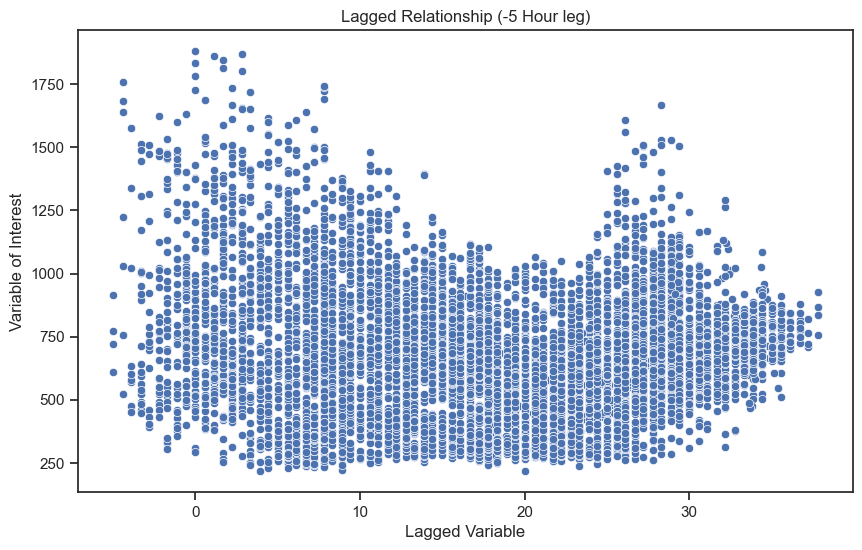

Correlation between Lagged Variable and Variable of Interest: -0.10823298562420249


In [49]:
import matplotlib.pyplot as plt
# Create lagged version of the variable you want to lag
lag_periods = -5  # Adjust this based on the desired lag
time_series_data['lagged_variable'] = time_series_data['Temperature'].shift(lag_periods)

# Drop rows with NaN resulting from the shift operation
time_series_data = time_series_data.dropna()

# Visualize the lagged relationship using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lagged_variable', y='Power', data=time_series_data)
plt.title(f'Lagged Relationship ({lag_periods} Hour leg)')
plt.xlabel('Lagged Variable')
plt.ylabel('Variable of Interest')
plt.show()

# Calculate the correlation between the lagged variable and the variable of interest
correlation = time_series_data['lagged_variable'].corr(time_series_data['Power'])
print(f"Correlation between Lagged Variable and Variable of Interest: {correlation}")


As there is very little relation between lagged variables and the power consumption, lets examine interaction effects

In [50]:
time_series_data['Temp_Humidity'] = time_series_data['Temperature'] * time_series_data['Humidity']

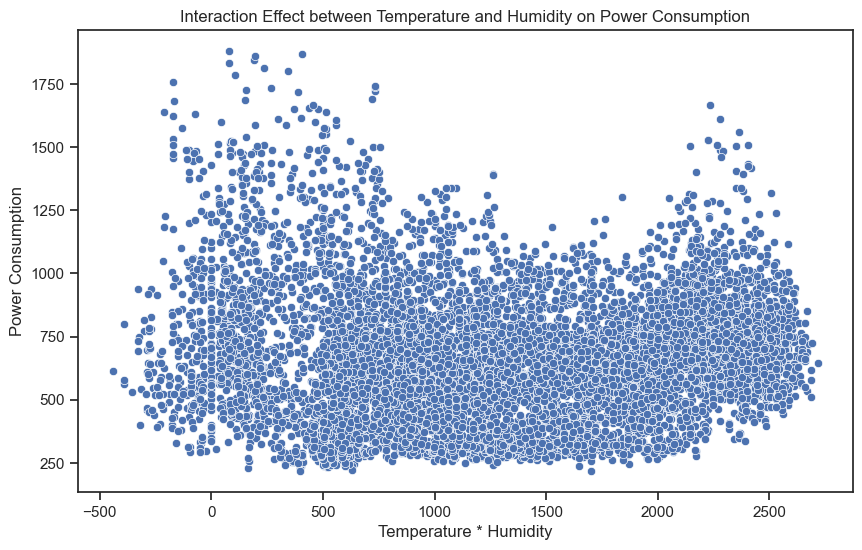

In [51]:
# Scatter plot for interaction effect
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_Humidity', y='Power', data=time_series_data)
plt.title('Interaction Effect between Temperature and Humidity on Power Consumption')
plt.xlabel('Temperature * Humidity')
plt.ylabel('Power Consumption')
plt.show()

In [52]:
correlation_temp_humidity = time_series_data['Temp_Humidity'].corr(time_series_data['Power'])
print(f"Correlation between Temp_Humidity and PowerConsumption: {correlation_temp_humidity}")

Correlation between Temp_Humidity and PowerConsumption: -0.032691287306840795


# Load profiling

C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\395082434.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



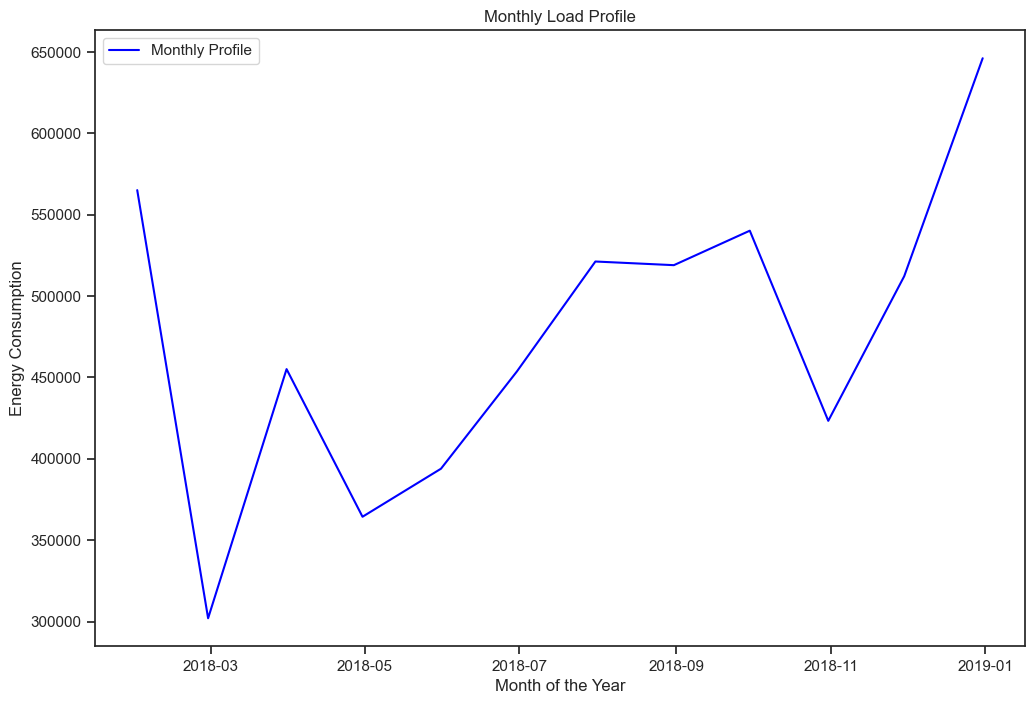

In [53]:
monthly_profiles = time_series_data.resample('M').sum()
#hourly_profiles = time_series_data.resample('H').mean()

plt.figure(figsize=(12, 8))
plt.plot(monthly_profiles.index, monthly_profiles['Power'], label='Monthly Profile', color='blue')
plt.title('Monthly Load Profile')
plt.xlabel('Month of the Year')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [54]:
monthly_profiles

Temperature  Humidity       Power  lagged_variable  Temp_Humidity
Time                                                                         
2018-01-31      2683.50   53223.0  565131.615          2668.60   1.970425e+05
2018-02-28      3600.70   44027.0  302002.730          3641.20   2.350269e+05
2018-03-31      9545.00   52524.5  455124.180          9584.60   6.429206e+05
2018-04-30     12777.00   45251.0  364386.940         12816.90   7.942799e+05
2018-05-31     16983.90   53287.0  393913.120         16959.90   1.230200e+06
2018-06-30     18854.30   52255.0  453706.520         18883.30   1.338624e+06
2018-07-31     21456.50   55997.0  521259.835         21474.80   1.642843e+06
2018-08-31     20784.30   54427.0  519013.030         20782.10   1.601337e+06
2018-09-30     18648.65   54357.0  540205.200         18607.45   1.396207e+06
2018-10-31     14055.55   48844.0  423338.710         14015.65   8.979640e+05
2018-11-30     10247.30   57529.0  512215.410         10253.90   7.997560e+05
2018-12-31      4856.10   53622.0  646188.270          4804.60   4.028653e+05

In [55]:
visData = go.Scatter(mode = "lines", y = monthly_profiles.Power)
layout = go.Layout(title = 'Consumption', xaxis=dict(title='Date'), yaxis=dict(title='((kW))'))
fig4 = go.Figure(data=[visData],layout=layout)

iplot(fig4)

In [56]:
# Specify the root directory path containing yearly energy consumption folders
root_directory = 'C:/Users/Sourabh.Bharti/Desktop/High-resolution electric power load data of an industrial park/Yearly_energy'

# Initialize an empty dictionary to store yearly DataFrames
yearly_data_dict = {}

# Iterate through each yearly folder in the root directory
for year_folder in os.listdir(root_directory):
    year_folder_path = os.path.join(root_directory, year_folder)

    # Check if it's a directory (to skip any non-directory files)
    if os.path.isdir(year_folder_path):
        # Initialize an empty list to store DataFrames for the current year
        dfs_for_year = []

        # Iterate through each file in the yearly folder
        for filename in os.listdir(year_folder_path):
            if filename.endswith('.xlsx'):
                file_path = os.path.join(year_folder_path, filename)

                # Read the Excel file into a Pandas DataFrame
                df = pd.read_excel(file_path, parse_dates=['Time'])

                # Assuming the timestamp column is named 'timestamp'
                # You may need to adjust column names based on your actual data

                # Append the DataFrame to the list
                dfs_for_year.append(df)

        # Concatenate all DataFrames for the current year
        combined_df_for_year = pd.concat(dfs_for_year, ignore_index=True)

        # Store the combined DataFrame in the yearly_data_dict with the year folder name as the key
        yearly_data_dict[year_folder] = combined_df_for_year

# Example: Accessing the combined DataFrame for a specific year
# df_for_specific_year = yearly_data_dict['2022']

In [57]:
data_dict = yearly_data_dict.copy()

In [58]:
data_dict

{'2016':                     Time  Power (kW)
 0    2016-01-01 00:00:00         NaN
 1    2016-01-01 01:00:00         NaN
 2    2016-01-01 02:00:00         NaN
 3    2016-01-01 03:00:00         NaN
 4    2016-01-01 04:00:00         NaN
 ...                  ...         ...
 9145 2016-12-31 20:00:00         NaN
 9146 2016-12-31 21:00:00         NaN
 9147 2016-12-31 22:00:00         NaN
 9148 2016-12-31 23:00:00         NaN
 9149 2017-01-01 00:00:00         NaN
 
 [9150 rows x 2 columns],
 '2017':                     Time  Power (kW)
 0    2017-01-01 00:00:00         NaN
 1    2017-01-01 01:00:00         NaN
 2    2017-01-01 02:00:00         NaN
 3    2017-01-01 03:00:00         NaN
 4    2017-01-01 04:00:00         NaN
 ...                  ...         ...
 9120 2017-12-31 20:00:00      887.73
 9121 2017-12-31 21:00:00      844.92
 9122 2017-12-31 22:00:00      872.58
 9123 2017-12-31 23:00:00      925.00
 9124 2018-01-01 00:00:00      840.76
 
 [9125 rows x 2 columns],
 '2018':        

# Initial data cleaning

In [59]:
# Iterate through the dictionary
for year, combined_df in data_dict.items():
    
    combined_df = combined_df.iloc[:-1]
    combined_df.drop_duplicates(subset=['Time'])
    combined_df['Power (kW)'] = combined_df['Power (kW)'].interpolate()
    combined_df['Time'] = pd.to_datetime(combined_df['Time'])
    
    print(combined_df.isnull().sum().sort_values(ascending = True))

Time            0
Power (kW)    440
dtype: int64
Time            0
Power (kW)    118
dtype: int64
Time          0
Power (kW)    0
dtype: int64
Time          0
Power (kW)    0
dtype: int64
Time          0
Power (kW)    0
dtype: int64
Time          0
Power (kW)    0
dtype: int64


C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\2056208231.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\2056208231.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\2056208231.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

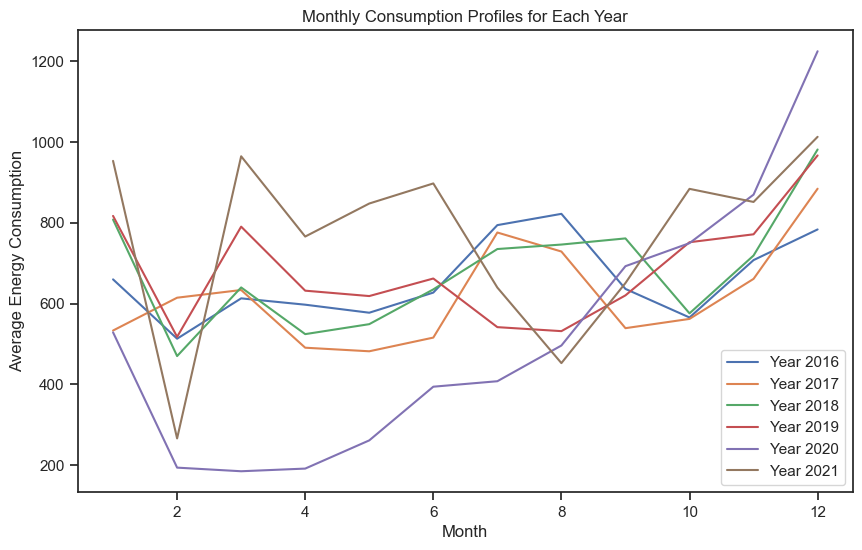

In [60]:
# Assuming you have the yearly_data_dict from the previous script

# Create a directory to store output if it doesn't exist
output_directory = 'C:/Users/Sourabh.Bharti/Desktop/High-resolution electric power load data of an industrial park'
os.makedirs(output_directory, exist_ok=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through the dictionary
for year, combined_df in data_dict.items():
    # Ensure the 'timestamp' column is in datetime format
    combined_df['Time'] = pd.to_datetime(combined_df['Time'])

    # Extract month from the timestamp
    combined_df['Month'] = combined_df['Time'].dt.month

    # Group by month and calculate the mean consumption for each year
    monthly_profiles = combined_df.groupby('Month')['Power (kW)'].mean().reset_index()

    # Plot the yearly consumption profile
    ax.plot(monthly_profiles['Month'], monthly_profiles['Power (kW)'], label=f'Year {year}')

# Customize plot labels and legends
ax.set_title('Monthly Consumption Profiles for Each Year')
ax.set_xlabel('Month')
ax.set_ylabel('Average Energy Consumption')
ax.legend()

# Save the plot as an image
plt.savefig(os.path.join(output_directory, 'combined_monthly_profiles.png'))

# Show the plot
plt.show()


# Combine the data for all the years to observe the patterns

In [61]:
data_2016 = data_dict['2016']
data_2017 = data_dict['2017']
data_2018 = data_dict['2018']
data_2019 = data_dict['2019']
data_2020 = data_dict['2020']
data_2021 = data_dict['2021']

In [62]:
all_data = pd.concat([data_2016, data_2017, data_2018, data_2019, data_2020, data_2021])

In [63]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54800 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        54800 non-null  datetime64[ns]
 1   Power (kW)  50405 non-null  float64       
 2   Month       54800 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.7 MB


In [64]:
all_data.drop(columns = 'Month')

Time  Power (kW)
0    2016-01-01 00:00:00         NaN
1    2016-01-01 01:00:00         NaN
2    2016-01-01 02:00:00         NaN
3    2016-01-01 03:00:00         NaN
4    2016-01-01 04:00:00         NaN
...                  ...         ...
9120 2021-12-31 20:00:00         NaN
9121 2021-12-31 21:00:00         NaN
9122 2021-12-31 22:00:00         NaN
9123 2021-12-31 23:00:00         NaN
9124 2022-01-01 00:00:00         NaN

[54800 rows x 2 columns]

In [65]:
all_data['Power (kW)'] = all_data['Power (kW)'].interpolate(method = 'linear')

In [66]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54800 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        54800 non-null  datetime64[ns]
 1   Power (kW)  54360 non-null  float64       
 2   Month       54800 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.7 MB


In [67]:
all_data.rename(columns={"Power (kW)": "Power"}, inplace=True)

In [68]:
visData = go.Scatter(x=all_data.Time, mode = "lines", y = all_data.Power)
layout = go.Layout(title = 'Consumption', xaxis=dict(title='Date'), yaxis=dict(title='((kW))'))
fig3 = go.Figure(data=[visData],layout=layout)
iplot(fig3)

# Stationary test

In [69]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54800 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    54800 non-null  datetime64[ns]
 1   Power   54360 non-null  float64       
 2   Month   54800 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.7 MB


In [70]:
from statsmodels.tsa.stattools import adfuller

In [71]:
all_data['Power'] = all_data['Power'].interpolate(method='linear')

In [72]:
# Determine # of Missing Values
print('# of Missing Power Values: {}'.format(len(all_data[all_data['Power'].isna()])))

# of Missing Power Values: 440


In [73]:
all_data = all_data.dropna()

In [74]:
adf_result = adfuller(all_data['Power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -7.13549262517211
p-value: 3.4297339091175896e-10


Time-series is stationary as p value is <0.05

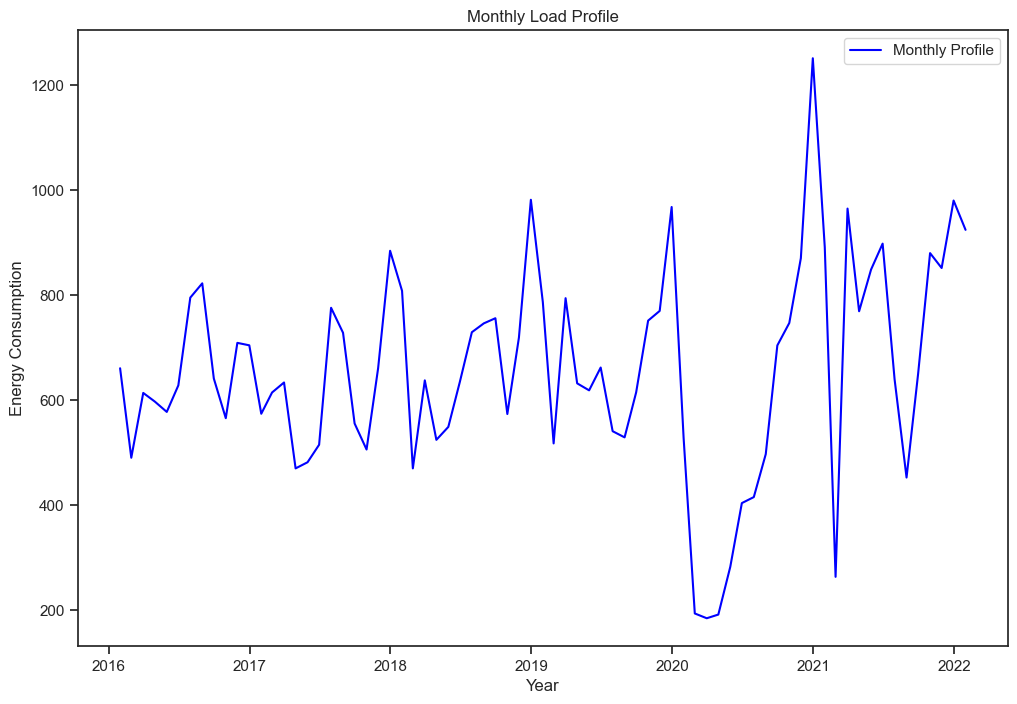

In [75]:
all_years_data = all_data.copy()
all_years_data = all_years_data.set_index('Time')
monthly_profiles = all_years_data.resample('M').mean()

plt.figure(figsize=(12, 8))
plt.plot(monthly_profiles.index, monthly_profiles['Power'], label='Monthly Profile', color='blue')
plt.title('Monthly Load Profile')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [76]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54360 entries, 440 to 9124
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    54360 non-null  datetime64[ns]
 1   Power   54360 non-null  float64       
 2   Month   54360 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.7 MB


In [78]:
all_data = all_data.drop(columns = ['Month'])

In [79]:
all_data['Power'] = all_data['Power'].interpolate(limit_area='inside', limit=None)

In [80]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54360 entries, 440 to 9124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    54360 non-null  datetime64[ns]
 1   Power   54360 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 MB


In [81]:
all_data = all_data[~all_data.index.duplicated()]

In [82]:
all_data = all_data.reset_index(drop=True)

C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\956143158.py:10: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.

C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\956143158.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



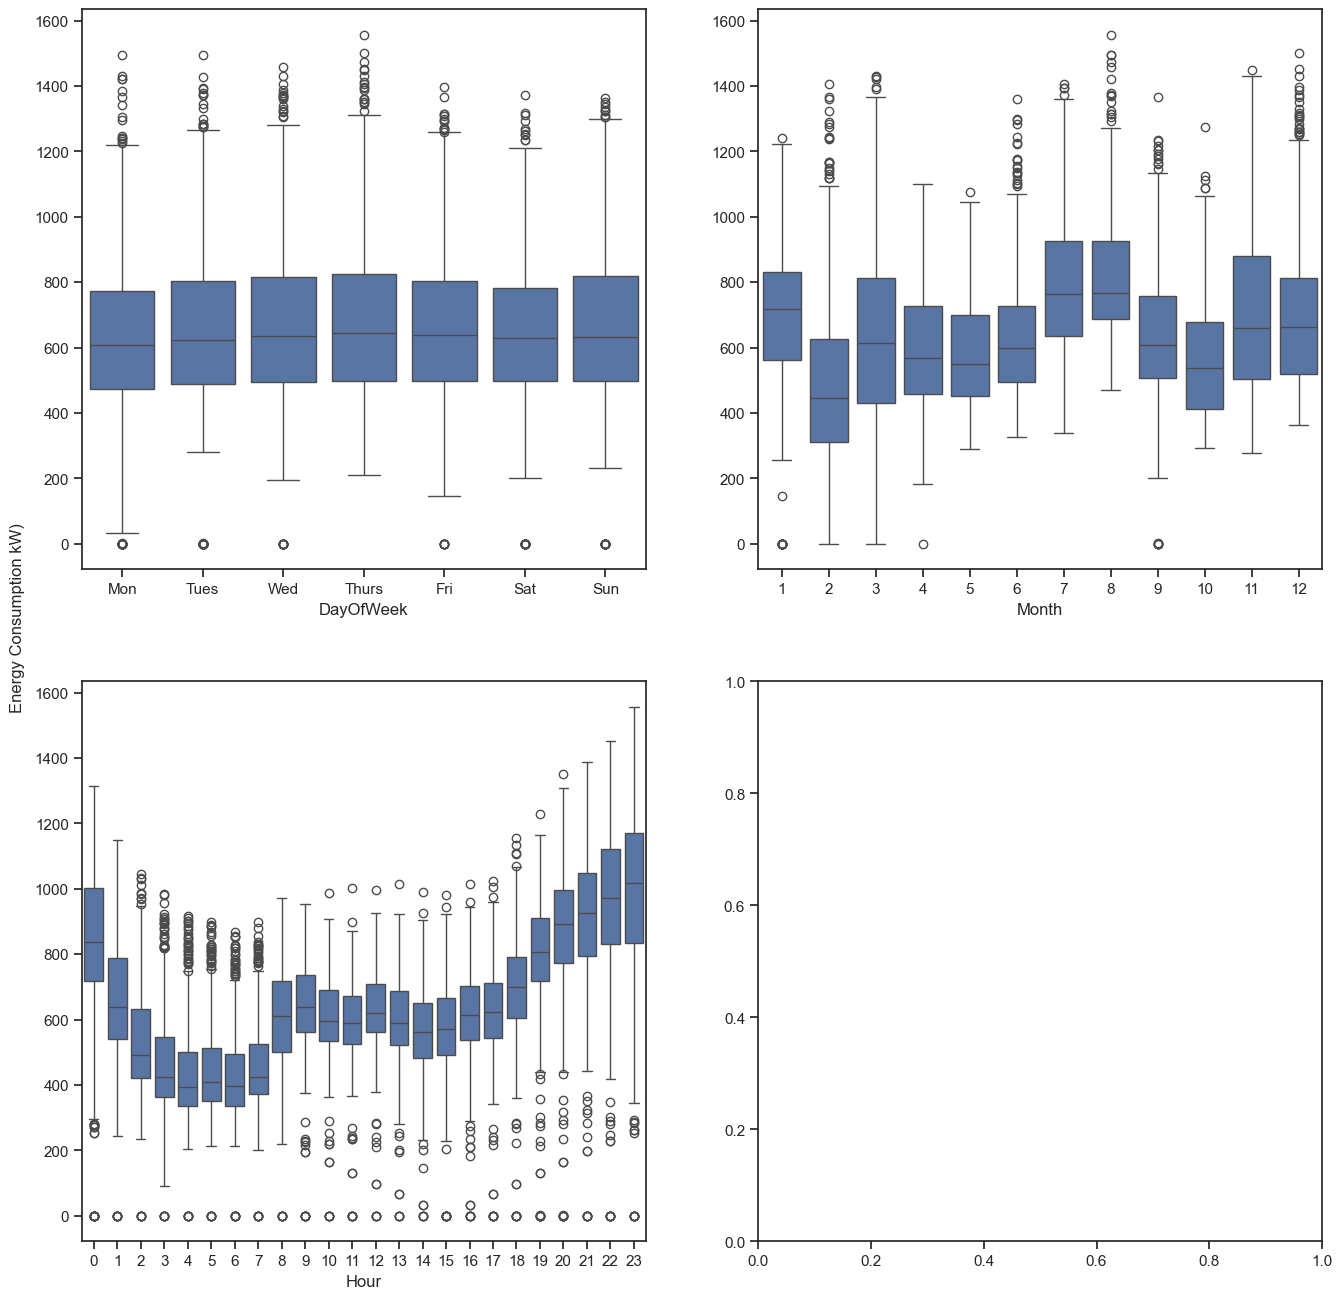

In [83]:
def create_features(df):
    df['Date'] = df.index
    df['Hour'] = df['Time'].dt.hour
    df['DayOfWeek'] = df['Time'].dt.dayofweek
    df['Quarter'] = df['Time'].dt.quarter
    df['Month'] = df['Time'].dt.month
    df['Year'] = df['Time'].dt.year
    df['DayOfYear'] = df['Time'].dt.dayofyear
    df['DayOfMonth'] = df['Time'].dt.day
    df['WeekOfYear'] = df['Time'].dt.weekofyear
    df['DayOfYearFloat'] = df['DayOfYear'] + df['Hour'] / 24
    df.drop('Date', axis=1, inplace=True)
    return df
all_data = create_features(all_data)

fig, axes = plt.subplots(2, 2, figsize=(16,16))
# Day of Week
dow_labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
g = sns.boxplot(x=all_data.DayOfWeek, y=all_data.Power, ax=axes[0][0])
g.set_xticklabels(dow_labels)
g.set_ylabel('')
# Month of Year
g = sns.boxplot(x=all_data.Month, y=all_data.Power, ax=axes[0][1])
g.set_ylabel('')
# Hour of Day
g = sns.boxplot(x=all_data.Hour, y=all_data.Power, ax=axes[1][0])
g.set_ylabel('')
# Year
#g = sns.boxplot(x=all_data.Year, y=all_data.Power, ax=axes[1][1])
#g.set_ylabel('')
fig.text(0.08, 0.5, 'Energy Consumption kW)', va='center', rotation='vertical')
plt.show()

# Lets see the consumption pattern before 2020 (2016-2019)

In [84]:
pre_covid_data_dict = yearly_data_dict.copy()

del pre_covid_data_dict['2020']
del pre_covid_data_dict['2021']

pre_covid_data_dict

In [85]:
for year, combined_df in yearly_data_dict.items():
    
    combined_df = combined_df.iloc[:-1]
    combined_df.drop_duplicates(subset=['Time'])
    combined_df['Power (kW)'] = combined_df['Power (kW)'].interpolate()
    combined_df['Time'] = pd.to_datetime(combined_df['Time'])
    print(combined_df.isnull().sum().sort_values(ascending = True))

Time            0
Month           0
Power (kW)    440
dtype: int64
Time            0
Month           0
Power (kW)    118
dtype: int64
Time          0
Power (kW)    0
Month         0
dtype: int64
Time          0
Power (kW)    0
Month         0
dtype: int64
Time          0
Power (kW)    0
Month         0
dtype: int64
Time          0
Power (kW)    0
Month         0
dtype: int64


C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\1324649829.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\1324649829.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Sourabh.Bharti\AppData\Local\Temp\ipykernel_43776\1324649829.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

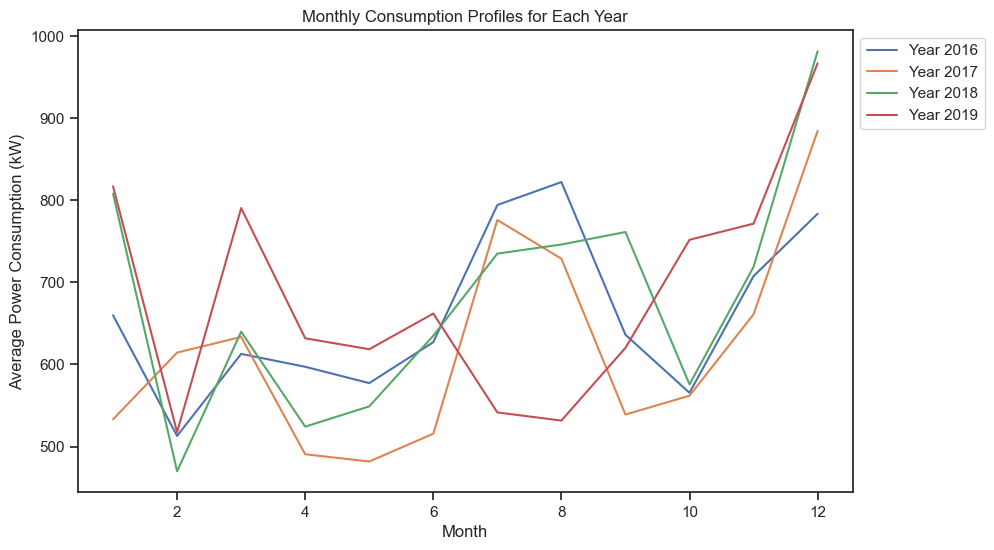

In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt

output_directory = 'C:/Users/Sourabh.Bharti/Desktop/High-resolution electric power load data of an industrial park'
os.makedirs(output_directory, exist_ok=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through the dictionary
for year, combined_df in pre_covid_data_dict.items():
    # Ensure 'Time' column is in datetime format
    combined_df['Time'] = pd.to_datetime(combined_df['Time'])

    # Extract month from the timestamp
    combined_df['Month'] = combined_df['Time'].dt.month

    # Group by month and calculate the mean consumption for each year
    monthly_profiles = combined_df.groupby('Month')['Power (kW)'].mean().reset_index()

    # Plot the yearly consumption profile
    ax.plot(monthly_profiles['Month'], monthly_profiles['Power (kW)'], label=f'Year {year}')

# Customize plot labels and legends
ax.set_title('Monthly Consumption Profiles for Each Year')
ax.set_xlabel('Month')
ax.set_ylabel('Average Power Consumption (kW)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot as an image
plt.savefig(os.path.join(output_directory, 'combined_monthly_profiles.png'))

# Show the plot
plt.show()


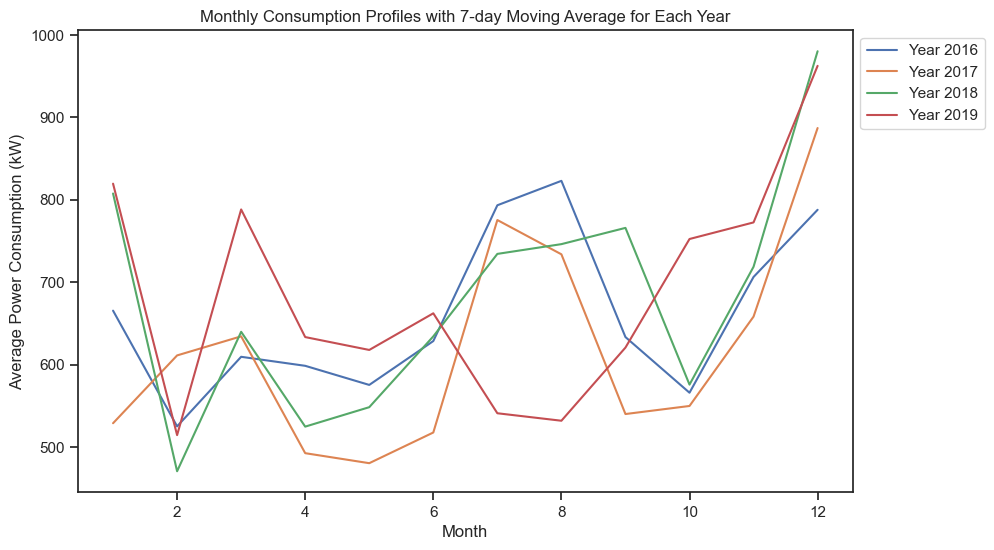

In [87]:
import os
import pandas as pd
import matplotlib.pyplot as plt

output_directory = 'C:/Users/Sourabh.Bharti/Desktop/High-resolution electric power load data of an industrial park'
os.makedirs(output_directory, exist_ok=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through the dictionary
for year, combined_df in pre_covid_data_dict.items():
    # Ensure 'Time' column is in datetime format
    combined_df['Time'] = pd.to_datetime(combined_df['Time'])

    # Extract month from the timestamp
    combined_df['Month'] = combined_df['Time'].dt.month

    # Calculate 7-day moving average for 'Power (kW)'
    combined_df['7-day MA'] = combined_df['Power (kW)'].rolling(window=7).mean()

    # Group by month and calculate the mean consumption for each year
    monthly_profiles = combined_df.groupby('Month')['7-day MA'].mean().reset_index()

    # Plot the yearly consumption profile with 7-day moving average
    ax.plot(monthly_profiles['Month'], monthly_profiles['7-day MA'], label=f'Year {year}')

# Customize plot labels and legends
ax.set_title('Monthly Consumption Profiles with 7-day Moving Average for Each Year')
ax.set_xlabel('Month')
ax.set_ylabel('Average Power Consumption (kW)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot as an image
plt.savefig(os.path.join(output_directory, 'combined_monthly_profiles_ma.png'))

# Show the plot
plt.show()


In [88]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9150 entries, 0 to 9149
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            9150 non-null   datetime64[ns]
 1   Power           9150 non-null   float64       
 2   Hour            9150 non-null   int64         
 3   DayOfWeek       9150 non-null   int64         
 4   Quarter         9150 non-null   int64         
 5   Month           9150 non-null   int64         
 6   Year            9150 non-null   int64         
 7   DayOfYear       9150 non-null   int64         
 8   DayOfMonth      9150 non-null   int64         
 9   WeekOfYear      9150 non-null   int64         
 10  DayOfYearFloat  9150 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 786.5 KB


In [89]:
all_years_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54360 entries, 2016-01-18 15:00:00 to 2022-01-01 00:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Power   54360 non-null  float64
 1   Month   54360 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.2 MB


In [90]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [91]:
data_exp = pd.concat([data_2016, data_2017, data_2018, data_2019, data_2020])

In [92]:
data_exp.head()

Time  Power (kW)  Month  7-day MA
0 2016-01-01 00:00:00         NaN      1       NaN
1 2016-01-01 01:00:00         NaN      1       NaN
2 2016-01-01 02:00:00         NaN      1       NaN
3 2016-01-01 03:00:00         NaN      1       NaN
4 2016-01-01 04:00:00         NaN      1       NaN

In [93]:
data_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45675 entries, 0 to 9149
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        45675 non-null  datetime64[ns]
 1   Power (kW)  41800 non-null  float64       
 2   Month       45675 non-null  int64         
 3   7-day MA    32386 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.7 MB


In [94]:
data_exp = data_exp.drop(data_exp.columns[[2,3]], axis = 1)

data_exp['Power (kW)'] = data_exp['Power (kW)'].interpolate(method = 'linear')

In [95]:
data_exp.head()

Time  Power (kW)
0 2016-01-01 00:00:00         NaN
1 2016-01-01 01:00:00         NaN
2 2016-01-01 02:00:00         NaN
3 2016-01-01 03:00:00         NaN
4 2016-01-01 04:00:00         NaN

In [96]:
data_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45675 entries, 0 to 9149
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        45675 non-null  datetime64[ns]
 1   Power (kW)  41800 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 MB


In [97]:
data_exp.set_index('Time', inplace=True)

In [98]:
data_exp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45675 entries, 2016-01-01 00:00:00 to 2021-01-01 00:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Power (kW)  41800 non-null  float64
dtypes: float64(1)
memory usage: 713.7 KB


In [99]:
data_exp.tail()

Power (kW)
Time                           
2020-12-31 20:00:00         NaN
2020-12-31 21:00:00         NaN
2020-12-31 22:00:00         NaN
2020-12-31 23:00:00     1734.12
2021-01-01 00:00:00     1765.98

In [100]:

duplicate_mask = data_exp.index.duplicated()

# Check if there are any duplicates
if duplicate_mask.any():
       # Alternatively, you can choose to keep the first occurrence and remove subsequent duplicates:
    data_exp = data_exp[~data_exp.index.duplicated(keep='first')]

# Now you can proceed with reindexing, if necessary


In [175]:
pip show statsmodels

Name: statsmodelsNote: you may need to restart the kernel to use updated packages.

Version: 0.14.1
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: c:\users\sourabh.bharti\anaconda3\envs\tpot\lib\site-packages
Requires: numpy, numpy, packaging, pandas, patsy, scipy, scipy
Required-by: 


In [186]:
import statsmodels.api as sm

# Specify SARIMA model parameters (replace with your own values)
order = (1, 1, 1)            # Non-seasonal components (p, d, q)
seasonal_order = (1, 1, 1, 24)  # Seasonal components (P, D, Q, s) 
#during visualisation, we observed the 24 hour seasonality in the data so the value of s is kept as 24

data_exp = data_exp.asfreq('H')

# Fit SARIMA model
sarima_model = sm.tsa.SARIMAX(data_exp, order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(mle_regression = True, low_memory=True, cov_type='none')

# Forecast future time steps (replace 12 with the number of steps you want to forecast)
forecast_steps = 8760
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)

# Print or visualize the forecasts
print(sarima_forecast)


C:\Users\Sourabh.Bharti\Anaconda3\envs\tpot\lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: mle_regression. After release 0.14, this will raise.



2021-01-01 01:00:00    1296.166663
2021-01-01 02:00:00     875.981053
2021-01-01 03:00:00     643.968655
2021-01-01 04:00:00     574.995745
2021-01-01 05:00:00     573.750857
                          ...     
2021-12-31 20:00:00    1233.026700
2021-12-31 21:00:00    1325.354494
2021-12-31 22:00:00    1496.265874
2021-12-31 23:00:00    1660.629031
2022-01-01 00:00:00    1587.737743
Freq: H, Name: predicted_mean, Length: 8760, dtype: float64


In [187]:
start_date = '2021-01-01 00:00:00'
end_date = '2021-07-02 00:00:00'

# Convert the timestamp column to a datetime object if it's not already
#consumption_data_interpolated['Time'] = pd.to_datetime(consumption_data_interpolated['Time'])

# Filter the DataFrame for the specified date range
test_data = data_2021[(data_2021['Time'] >= start_date) & (data_2021['Time'] <= end_date)]


In [188]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4550
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        4551 non-null   datetime64[ns]
 1   Power (kW)  4346 non-null   float64       
 2   Month       4551 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 142.2 KB


In [189]:
test_data.head()

Time  Power (kW)  Month
0 2021-01-01 00:00:00     1765.98      1
1 2021-01-01 01:00:00     1524.23      1
2 2021-01-01 02:00:00     1286.85      1
3 2021-01-01 03:00:00     1033.40      1
4 2021-01-01 04:00:00      913.80      1

In [190]:
test_data.set_index('Time', inplace=True)

In [191]:
test_data = test_data.tail(-1)

In [192]:
test_data = test_data.drop(columns=['Month'])

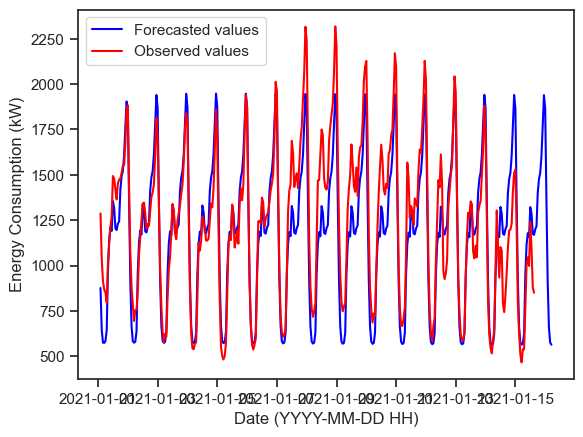

In [193]:
plt.plot(sarima_forecast.iloc[1:365], color = 'blue', label = 'Forecasted values')
plt.plot(test_data.iloc[1:365], color = 'red', label = 'Observed values')
plt.xlabel('Date (YYYY-MM-DD HH)')
plt.ylabel('Energy Consumption (kW)')
plt.legend()

In [194]:
import pickle

In [196]:
with open('SARIMAv4.pkl', 'wb') as f:
    pickle.dump(sarima_fit, f)

In [137]:
pickled_model = pickle.load(open('SARIMAv3.pkl', 'rb'))

In [138]:
pickled_model.forecast(steps=24)

2021-01-01 01:00:00    1296.166663
2021-01-01 02:00:00     875.981053
2021-01-01 03:00:00     643.968655
2021-01-01 04:00:00     574.995745
2021-01-01 05:00:00     573.750857
2021-01-01 06:00:00     583.765003
2021-01-01 07:00:00     642.647742
2021-01-01 08:00:00     972.532249
2021-01-01 09:00:00    1143.366307
2021-01-01 10:00:00    1211.516968
2021-01-01 11:00:00    1190.663030
2021-01-01 12:00:00    1354.351066
2021-01-01 13:00:00    1316.158146
2021-01-01 14:00:00    1204.857449
2021-01-01 15:00:00    1196.111242
2021-01-01 16:00:00    1230.790919
2021-01-01 17:00:00    1242.904897
2021-01-01 18:00:00    1419.243203
2021-01-01 19:00:00    1490.994868
2021-01-01 20:00:00    1521.245557
2021-01-01 21:00:00    1603.419057
2021-01-01 22:00:00    1761.405527
2021-01-01 23:00:00    1903.561032
2021-01-02 00:00:00    1853.057014
Freq: H, Name: predicted_mean, dtype: float64